In [1]:
# Import necessary packages

import numpy as np
import opendssdirect as dss
# from utils.device.Inverter import Inverter
# from utils.controller.AdaptiveInvController import AdaptiveInvController
# from utils.controller.FixedInvController import FixedInvController
import matplotlib.pyplot as plt
from math import tan,acos
import copy
import pandas as pd
import time

from collections import deque
import signal_processing as signal_processing

# import numpy as np
# from matplotlib.mlab import PCA
# from sklearn.decomposition import PCA

import scipy.linalg as spla

In [2]:
# Set global variables and parameters, and test OpenDSS with network


#######################################################
###Global variable initialization and error checking###
#######################################################

# Sbase=1
# LoadScalingFactor = 3
# GenerationScalingFactor = 5
SlackBusVoltage = 1.00
# NoiseMultiplyer= 1
# #Set simulation analysis period - the simulation is from StartTime to EndTime
# StartTime = 40600
# EndTime = StartTime + 640
# EndTime += 1 # creating a list, last element does not count, so we increase EndTime by 1
# #Set hack parameters
# TimeStepOfHack = 160
# PercentHacked = np.array([0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0])

#Set initial VBP parameters for uncompromised inverters
# VBP_normal=np.array([0.97, 1, 1, 1.03, 1.06])
# VBP_attack=np.array([0.997, 1, 1, 1.003, 1.007])

#Set delays for each node
# Delay_VBPCurveShift = (30+2*np.random.randn(31)).astype(int)
# #Delay_VBPCurveShift = (10+2*np.random.randn(31)).astype(int)
# lpf_meas_vector = (1+0.2*np.random.randn(31))
# lpf_output_vector= (0.1+0.015*np.random.randn(31))

#Set observer voltage threshold
# ThreshHold_vqvp = 0.06
# adaptive_gain=800

# power_factor=0.9
# pf_converted=tan(acos(power_factor))


#Error checking of the global variable -- TODO: add error handling here!
# if EndTime < StartTime or EndTime < 0 or StartTime < 0:
#     print('Setup Simulation Times Inappropriately.')
# if NoiseMultiplyer < 0:
#     print('Setup Noise Multiplyer Correctly.')

# Select OpenDSS file
dss.run_command('Redirect 05node_singlephase_balanced_oscillation_nn_01.dss')

# Solve power flow with OpenDSS file
dss.Solution.Solve()
if not dss.Solution.Converged():
    print('Initial Solution Not Converged. Check Model for Convergence')
else:
    print('Initial Model Converged. Proceeding to Next Step.')
    #Doing this solve command is required for GridPV, that is why the monitors
    #go under a reset process
    dss.Monitors.ResetAll()
    
    #set solution Params
    #setSolutionParams(dss,'daily',1,1,'off',1000000,30000)
    dss.Solution.Mode(1)
    dss.Solution.Number(1)
    dss.Solution.StepSize(1)
    dss.Solution.ControlMode(-1)
    dss.Solution.MaxControlIterations(1000000)
    dss.Solution.MaxIterations(50000)
    #Easy process to get all names and count of loads, a trick to avoid
    #some more lines of code
    TotalLoads=dss.Loads.Count()
    AllLoadNames=dss.Loads.AllNames()
    print('OpenDSS Model Compliation Done.')

print('')

# Print number of buses, and bus names
print('Number of Buses: ' + str(len(dss.Circuit.AllBusNames())))
print('Buses: ' + str(dss.Circuit.AllBusNames()))

# Print number of line, and line names
print('Number of Lines: ' + str(len(dss.Lines.AllNames())))
print('Lines: ' + str(dss.Lines.AllNames()))

# Print number of loads, and load names
print('Number of Loads: ' + str(len(dss.Loads.AllNames())))
print('Loads: ' + str(dss.Loads.AllNames()))

print('')

# Print different voltage measurements
for k1 in range(len(dss.Circuit.AllBusNames())):
    if dss.Circuit.AllBusNames()[k1] == 'sourcebus':
        dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
        
        print(dss.Circuit.AllBusNames()[k1])
        print('BASE - LN')
        print(dss.Bus.kVBase())
        print('VMAGANGLE - LN POLAR')
        print(dss.Bus.VMagAngle())
        print('puVMAGANGLE - LN POLAR')
        print(dss.Bus.puVmagAngle())
        print('VOTLAGES - LN CARTESIAN')
        print(dss.Bus.Voltages())
        print('puVOTLAGES - LN CARTESIAN')
        print(dss.Bus.PuVoltage())
        print('VLL - LL CARTESIAN')
        print(dss.Bus.VLL())
        print('puVLL - LL CARTESIAN')
        print(dss.Bus.puVLL())
        
        tempvoltage = dss.Bus.Voltages()
        
        Vab = tempvoltage[0]
        
print('')
        
for k1 in range(len(dss.Circuit.AllBusNames())):
    dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
    print(dss.Circuit.AllBusNames()[k1])
    print('BASE - LN')
    print(dss.Bus.kVBase())
    print('VMAGANGLE - LN POLAR')
    print(dss.Bus.VMagAngle())
    print('puVMAGANGLE - LN POLAR')
    print(dss.Bus.puVmagAngle())
    print('')

    
# for k1 in range(len(AllLoads)):
#     dss.Loads.Name(AllLoads[k1])
#     print(dss.Loads.Name())
#     print(dss.CktElement.NodeOrder())
#     print(dss.Loads.kW())
#     print(dss.Loads.kvar())    
#     print(dss.Loads.kV())
#     print(dss.Loads.kVABase())

for k1 in range(len(dss.RegControls.AllNames())):
    print(dss.RegControls.AllNames()[k1])
    dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    print(dss.RegControls.TapNumber())
    print('')


Initial Model Converged. Proceeding to Next Step.
OpenDSS Model Compliation Done.

Number of Buses: 7
Buses: ['sourcebus', 'a01', 'a02', 'a03', 'a04', 'a05', 'a06']
Number of Lines: 5
Lines: ['line_a01_a02', 'line_a02_a03', 'line_a03_a04', 'line_a03_a05', 'line_a05_a06']
Number of Loads: 4
Loads: ['load_a02_a', 'load_a03_a', 'load_a04_a', 'load_a06_a']

sourcebus
BASE - LN
132.79056191361394
VMAGANGLE - LN POLAR
[132790.08544768803, -0.0003269170351687338, 132790.5166238329, -120.00000859905198, 132790.60185674593, 119.99998738587138]
puVMAGANGLE - LN POLAR
[0.9999964118991664, -0.0003269170351687338, 0.999999658938253, -120.00000859905198, 1.000000300797974, 119.99998738587138]
VOTLAGES - LN CARTESIAN
[132790.0854455265, -0.7576708337923693, -66395.27558424673, -114999.95080571283, -66395.27562311836, 115000.04920175885]
puVOTLAGES - LN CARTESIAN
[0.9999964118828886, -5.705758171919382e-06, -0.4999999595410987, -0.8660250333192002, -0.4999999598338276, 0.8660257743059436]
VLL - LL CAR

In [3]:
# Inverter object class

class inverter():
    
    # Initialize
    def __init__(self):
                
        self.reactive_power = 0 # current reactive power
    
        # Volt-VAr curve breakpoints
        # inject maximum reactive power at Vlp <= VBP[0] : f(Vlp <= VBP[0]) = -1
        # inject reactive power based on linear function from VBP[0]<= Vlp <= VBP[1] : f(VBP[0]) = -1, f(VBP[1]) = 0
        # inject no reactive power from VBP[1]<= Vlp <= VBP[2] : f(VBP[1] = Vlp <= VBP[2] ) = 0
        # consume reactive power based on linear function from VBP[2]<= Vlp <= VBP[3] : f(VBP[2]) = 0, f(VBP[3]) = +1
        # inject maximum reactive power at Vlp >= VBP[3] : f(Vlp >= VBP[3]) = +1
        self.VBP = np.array([0.97, 0.99, 1.01, 1.03]) # Volt-VAr curve breakpoints
        
        # lowpass filter cutoff frequency - this determines how much low and high frequency content of voltage magnitude measurements pass thourh
        # lower values mean the filter reacts more slowly to rapid changes in voltage magnitude (more inertia)
        # higher values mean the filter reacts faster to rapid changes in voltage magnitude (less inertia)
        # Important: wlp/(2*pi) <= (1/2)*(1/Ts)
        self.flp = 2.0 # lowpass filter cutoff frequency [Hz]
        self.wlp = 2*np.pi*self.flp # lowpass filter cutoff frequency [rad/s]     
        
        self.Ts = 1.0 # lowpass filter timestep [s]        
        
        # measured voltage magnitude
        self.Vmeas = [0] # measured voltage        
        
        # filtered voltage magnitude - this value is input to the Volt-VAr curve
        self.Vlp = [0] # lowpass filter voltage
        
        
        self.reactive_power = 0 # reactive power
        
        
        self.hackFlag = False # attack status
        
        
        self.VAr_capacity = 200 # VAr capacity        
        
        self.qset = [0] # reactive power setpoint        
        self.qin = [0] # reactive power consumed
    
    # Set timesteps for asynchronous inverter operation
    def set_timesteps(self, Ts, time, numTimeSteps):        
        
        self.Ts = Ts # Simulation timestep        
        
        self.numTimeSteps = numTimeSteps # number of simulation timesteps, based on simulation
        
        self.Vmeas = np.zeros(numTimeSteps) # measured voltage
        self.Vlp = np.zeros(numTimeSteps) # lowpas filtered voltage

        self.reactive_power = np.zeros(numTimeSteps)

        self.pset = np.zeros(numTimeSteps) # active power setpoint
        self.pin = np.zeros(numTimeSteps) # active power consumed

        self.qset = np.zeros(numTimeSteps) # reactive power setpoint
        self.qin = np.zeros(numTimeSteps) # reactive power consumed
        
        self.kop = 0 # inverter operation timestep
        self.timeop = np.zeros(numTimeSteps) # inverter operation timestep simulation times
        self.Nop = 0 # inverter total operation timesteps
        
        self.VBPhist = np.zeros((numTimeSteps,4)) # history of voltage breakpoints
        
    # Set inveter operation timesteps
    def set_opertime(self, Top, Toff):
        
        self.kop = 0 # inverter operation timestep
        
        self.Top = Top # inverter operation timestep length
        self.Toff = Toff # inverter operation time offset
        
        self.Tlast = self.Toff # last inverter operation timestep elapsed
        
    # set the index of the bus where the inverter is located
    def set_busidx(self, busidx):
        self.busidx = busidx
        
    # set the name of the bus where the inverter is located
    def set_busname(self, busname):
        self.busname = busname
    
    # set connection type
    def set_connection(self, conn):
        self.conn = conn
    
    # set phase
    def set_phase(self, phase):
        self.phase = phase
        
    # set the name of the node where the inverter is located
    def set_loadname(self, loadname):
        self.loadname = loadname
    
    # set VAr capacity
    def set_VAr_capacity(self, VAr_capacity):
        self.VAr_capacity = VAr_capacity
    
    # set lowpass filter cutoff frequency
    def set_lowpass_frequency(self, flp):
        self.flp = flp
        self.wlp = 2*np.pi*self.flp
    
    # set Volt-VAr curve breakpoints
    def set_VBP(self, VBP):
        self.VBP = VBP
    
    # set measured voltage
    def measure_voltage(self, kt, Vmeas):
        self.Vmeas[kt] = Vmeas # measured voltage        
        self.VBPhist[kt,:] = self.VBP # store VBP at current op timestep for history
    
    # lowpass filter voltage measurements
    def lowpass(self, kt):
        # initialize lowpas filter voltage array
        if kt == 0:
            self.Vlp[kt] = self.Vmeas[kt]
        # lowpass filter measured voltage
        else:
            self.Vlp[kt] = (1 - self.wlp*self.Top)*self.Vlp[kt-1] + self.wlp*self.Top*self.Vmeas[kt-1]
            self.Vlp[kt] = 1/(2 + self.wlp*self.Top)*((2 - self.wlp*self.Top)*self.Vlp[kt-1] + self.wlp*self.Top*(self.Vmeas[kt] + self.Vmeas[kt-1]))
    
    # compute reactive power from lowpass filtered voltage and Volt-Var curve
    def compute_reactive_power_output(self, kt, Vcomp):
        # compute percent of VAr capacity to source/sink based on Vlp
        if Vcomp <= self.VBP[0]:
            self.reactive_power[kt] = -100
        elif self.VBP[0] <= Vcomp <= self.VBP[1]:
            self.reactive_power[kt] =100/(self.VBP[1] - self.VBP[0])*(Vcomp - self.VBP[1])
        elif self.VBP[1] <= Vcomp <= self.VBP[2]:
            self.reactive_power[kt] = 0
        elif self.VBP[2] <= Vcomp <= self.VBP[3]:
            self.reactive_power[kt] = 100/(self.VBP[3] - self.VBP[2])*(Vcomp - self.VBP[2])
        elif self.VBP[3] <= Vcomp:
            self.reactive_power[kt] = 100        
        
        self.qset[kt] = 1/100*self.VAr_capacity*self.reactive_power[kt] # reactive power setpoint in kVAr
        self.qin[kt] = self.qset[kt] # reactive power consumed in kVAr
    
    # truncate arrays to total number of operation timesteps for plotting
    def truncate_time_data(self):
            
        self.Nop = self.kop
    
        self.timeop = self.timeop[0:self.Nop+1]

        self.Vmeas = self.Vmeas[0:self.Nop+1]
        self.Vlp = self.Vlp[0:self.Nop+1]

        self.pset = self.pset[0:self.Nop+1]
        self.pin = self.pin[0:self.Nop+1]

        self.reactive_power = self.reactive_power[0:self.Nop+1]
        self.qset = self.qset[0:self.Nop+1]
        self.qin = self.qin[0:self.Nop+1]
        
        self.VBPhist = self.VBPhist[0:self.Nop+1,:]

# # Inverter object class

# class inverter():
    
#     # Initialize
#     def __init__(self):
                
#         self.reactive_power = 0 # current reactive power
    
        
#         self.VBP = np.array([0.97, 0.99, 1.01, 1.03]) # Volt-VAr curve breakpoints
        
        
#         self.wlp = 2*np.pi*2.0 # lowpass filter cutoff frequency        
        
#         self.Ts = 1.0 # lowpass filter timestep        
        
#         self.Vmeas = [0] # measured voltage
        
        
#         self.Vlp = [0] # lowpass filter voltage
        
        
#         self.reactive_power = 0 # reactive power
        
        
#         self.hackFlag = False # attack status
        
        
#         self.VAr_capacity = 200 # VAr capacity        
        
#         self.qset = [0] # reactive power setpoint        
#         self.qin = [0] # reactive power consumed
    
#     # Set timesteps for asynchronous inverter operation
#     def set_timesteps(self, Ts, time, numTimeSteps):        
        
#         self.Ts = Ts # Simulation timestep        
        
#         self.numTimeSteps = numTimeSteps # number of simulation timesteps, based on simulation
        
#         self.Vmeas = np.array([]) # measured voltage
#         self.Vlp = np.array([]) # lowpas filtered voltage

#         self.pset = np.array([0]) # active power setpoint
#         self.pin = np.array([0]) # active power consumed

#         self.qset = np.array([0]) # reactive power setpoint
#         self.qin = np.array([0]) # reactive power consumed
        
#         self.kop = 0 # inverter operation timestep
#         self.timeop = np.array([]) # inverter operation timestep simulation times
#         self.Nop = 0 # inverter total operation timesteps
        
#         self.VBPhist = np.empty(4) # history of voltage breakpoints
        
#     # Set inveter operation timesteps
#     def set_opertime(self, Top, Toff):
        
#         self.kop = 0 # inverter operation timestep
        
#         self.Top = Top # inverter operation timestep length
#         self.Toff = Toff # inverter operation time offset
        
#         self.Tlast = self.Toff # last inverter operation timestep elapsed
        
#     # set the index of the bus where the inverter is located
#     def set_busidx(self, busidx):
#         self.busidx = busidx
        
#     # set the name of the bus where the inverter is located
#     def set_busname(self, busname):
#         self.busname = busname
    
#     # set connection type
#     def set_connection(self, conn):
#         self.conn = conn
    
#     # set phase
#     def set_phase(self, phase):
#         self.phase = phase
        
#     # set the name of the node where the inverter is located
#     def set_loadname(self, loadname):
#         self.loadname = loadname
    
#     # set VAr capacity
#     def set_VAr_capacity(self, VAr_capacity):
#         self.VAr_capacity = VAr_capacity
    
#     # set lowpass filter cutoff frequency
#     def set_lowpass_frequency(self, wlp):
#         self.wlp = wlp
    
#     # set Volt-VAr curve breakpoints
#     def set_VBP(self, VBP):
#         self.VBP = VBP
    
#     # set measured voltage
#     def measure_voltage(self, Vmeas):
#         np.append(self.Vmeas, Vmeas) # measured voltage        
#         np.append(self.VBPhist, self.VBP) # store VBP at current op timestep for history
    
#     # lowpass filter voltage measurements
#     def lowpass(self):
#         # initialize lowpas filter voltage array
#         if kt == 0:
#             np.append(self.Vlp, self.Vmeas)
#         # lowpass filter measured voltage
#         else:
#             np.append(self.Vlp, (1 - self.wlp*self.Top)*self.Vlp[-1] + self.wlp*self.Top*self.Vmeas[-2])
#             np.append(self.Vlp, 1/(2 + self.wlp*self.Top)*((2 - self.wlp*self.Top)*self.Vlp[-1] + self.wlp*self.Top*(self.Vmeas[-1] + self.Vmeas[-2])))

#     # compute active power from lowpass filtered voltage and Volt-Var curve
#     def compute_active_power_output(self, Vcomp):
#         np.append(self.pset, 0)
#         np.append(self.pin, self.pset[-1])
    
#     # compute reactive power from lowpass filtered voltage and Volt-Var curve
#     def compute_reactive_power_output(self, Vcomp):
#         # compute percent of VAr capacity to source/sink based on Vlp
#         if Vcomp <= self.VBP[0]:
#             self.reactive_power[kt] = -100
#         elif self.VBP[0] <= Vcomp <= self.VBP[1]:
#             self.reactive_power[kt] =100/(self.VBP[1] - self.VBP[0])*(Vcomp - self.VBP[1])
#         elif self.VBP[1] <= Vcomp <= self.VBP[2]:
#             self.reactive_power[kt] = 0
#         elif self.VBP[2] <= Vcomp <= self.VBP[3]:
#             self.reactive_power[kt] = 100/(self.VBP[3] - self.VBP[2])*(Vcomp - self.VBP[2])
#         elif self.VBP[3] <= Vcomp:
#             self.reactive_power[kt] = 100        
        
#         np.append(self.qset, 1/100*self.VAr_capacity*self.reactive_power[-1]) # reactive power setpoint in kVAr
#         np.append(self.qin, self.qset[-1]) # reactive power consumed in kVAr
    
#     # truncate arrays to total number of operation timesteps for plotting
#     def truncate_time_data(self):
            
#         self.Nop = self.kop
    
#         self.timeop = self.timeop[0:self.Nop+1]

#         self.Vmeas = self.Vmeas[0:self.Nop+1]
#         self.Vlp = self.Vlp[0:self.Nop+1]

#         self.pset = self.pset[0:self.Nop+1]
#         self.pin = self.pin[0:self.Nop+1]

#         self.reactive_power = self.reactive_power[0:self.Nop+1]
#         self.qset = self.qset[0:self.Nop+1]
#         self.qin = self.qin[0:self.Nop+1]
#         self.VBPhist = self.VBPhist[0:self.Nop+1,:]
        


In [4]:
# Voltage oscillation observer - possible input to NN


class voltage_oscillation_observer():
    
    def __init__(self):
        
        pass
    
    def set_timesteps(self, Ts, time, numTimeSteps):
        
        self.Ts = Ts # operation timestep length [s]
        
        self.numTimeSteps = numTimeSteps
        
        self.x = np.zeros(numTimeSteps)
        
        self.x = np.zeros(numTimeSteps) # voltage magnitude measurement
        self.y1 = np.zeros(numTimeSteps) # output of highpass filter
        self.y2 = np.zeros(numTimeSteps) # output of square function
        self.y3 = np.zeros(numTimeSteps) # output of lowpass filter
        self.y4 = np.zeros(numTimeSteps) # output of rectifier gain
       
        self.kop = 0 # operation timestep index
        self.timeop = np.zeros(numTimeSteps)
        self.Nop = 0
        
    def set_opertime(self, Top, Toff):
        
        self.kop = 0
        
        self.Top = Top
        self.Toff = Toff
        
        self.Tlast = self.Toff
        
        # Frequency on which the observer concentrates
        # Oscillatory content both below and above this value is attenuated
        self.fosc = 2.0 # highpass filter and lowpass filter cutoff frequency [Hz]
        self.hp1, temp = signal_processing.butterworth_highpass(4,2*np.pi*1.0*self.fosc) # highpass filter
        self.lp1, temp = signal_processing.butterworth_lowpass(4,2*np.pi*1.0*self.fosc) # lowpass filter
        self.bp1num = np.convolve(self.hp1[0, :], self.lp1[0, :])
        self.bp1den = np.convolve(self.hp1[1, :], self.lp1[1, :])
        self.bp1s = np.array([self.bp1num, self.bp1den])
#         self.bp1s = self.hp1
        self.BP1z = signal_processing.c2dbilinear(self.bp1s, self.Top)
        self.lpf2, temp = signal_processing.butterworth_lowpass(2,2*np.pi*self.fosc/2)
        self.LPF2z = signal_processing.c2dbilinear(self.lpf2, self.Top)
        self.nbp1 = self.BP1z.shape[1] - 1
        self.nlpf2 = self.LPF2z.shape[1] - 1
        
    # set the index of the node where the inverter is located
    def set_busidx(self, busidx):
        self.busidx = busidx
        
    # set the name of the node where the inverter is located
    def set_busname(self, busname):
        self.busname = busname

    # set the connection of the node where the inverter is located
    def set_conn(self, conn):
        self.conn = conn

    # set the phase of the node where the inverter is located
    def set_phase(self, phase):
        self.phase = phase

    def set_voo_frequency(self, fvoo):

        # Frequency on which the observer concentrates
        # Oscillatory content both below and above this value is attenuated
        self.fosc = fvoo # highpass filter and lowpass filter cutoff frequency [Hz]
        self.hp1, temp = signal_processing.butterworth_highpass(4,2*np.pi*1.0*self.fosc) # highpass filter
        self.lp1, temp = signal_processing.butterworth_lowpass(4,2*np.pi*1.0*self.fosc) # lowpass filter
        self.bp1num = np.convolve(self.hp1[0, :], self.lp1[0, :])
        self.bp1den = np.convolve(self.hp1[1, :], self.lp1[1, :])
        self.bp1s = np.array([self.bp1num, self.bp1den])
#         self.bp1s = self.hp1
        self.BP1z = signal_processing.c2dbilinear(self.bp1s, self.Top)
        self.lpf2, temp = signal_processing.butterworth_lowpass(2,2*np.pi*self.fosc/2)
        self.LPF2z = signal_processing.c2dbilinear(self.lpf2, self.Top)
        self.nbp1 = self.BP1z.shape[1] - 1
        self.nlpf2 = self.LPF2z.shape[1] - 1

    # voltage observer operation
    def observe_voltage(self, kop, vk):
        
#         vk = np.abs(k.node.nodes[node_id]['voltage'][k.time - 1])
#         vkm1 = np.abs(k.node.nodes[node_id]['voltage'][k.time - 2])
#         self.v_meas_k = vk
#         self.v_meas_km1 = vkm1

        # voltage measurement input
        self.x[kop] = vk
    
        if kop >= self.BP1z.shape[1]:

            np.sum(-self.BP1z[1,0:-1]*self.y1[kop-self.BP1z.shape[1]+1:kop])
            np.sum(self.BP1z[0,:]*self.x[kop-self.BP1z.shape[1]+1:kop+1])
            
            # lowpass filter
            self.y1[kop] = (1/self.BP1z[1,-1]*(np.sum(-self.BP1z[1,0:-1]*self.y1[kop-self.BP1z.shape[1]+1:kop]) + np.sum(self.BP1z[0,:]*self.x[kop-self.BP1z.shape[1]+1:kop+1])))
            # square output of LPF
            self.y2[kop] = (self.y1[kop]**2)
            # highpass filter
            self.y3[kop] = (1/self.LPF2z[1,-1]*(np.sum(-self.LPF2z[1,0:-1]*self.y3[kop-self.LPF2z.shape[1]+1:kop]) + np.sum(self.LPF2z[0,:]*self.y2[kop-self.LPF2z.shape[1]+1:kop+1])))
#             self.y4[kop] = np.sqrt(np.abs(self.y3[kop]))
            # apply gain
            self.y4[kop] = 1e3*(self.y3[kop])
    
    # delete extraneous timesteps
    def truncate_time_data(self):
        
        self.Nop = self.kop
        self.timeop = self.timeop[0:self.Nop+1]
        self.x = self.x[0:self.Nop+1]
        self.y1 = self.y1[0:self.Nop+1]
        self.y2 = self.y2[0:self.Nop+1]
        self.y3 = self.y3[0:self.Nop+1]
        self.y4 = self.y4[0:self.Nop+1]
    

In [5]:
# Run simulation

dss.run_command('Redirect 05node_singlephase_balanced_oscillation_nn_01.dss')
dss.Solution.Solve()

if dss.Solution.Converged():
    print('Initial Model Converged. Proceeding to Next Step.')    
else:
    print('Initial Solution Not Converged. Check Model for Convergence')
    #Doing this solve command is required for GridPV, that is why the monitors
    #go under a reset process
    dss.Monitors.ResetAll()
    
    #set solution Params
    #setSolutionParams(dss,'daily',1,1,'off',1000000,30000)
    dss.Solution.Mode(1)
    dss.Solution.Number(1)
    dss.Solution.StepSize(1)
    dss.Solution.ControlMode(-1)
    dss.Solution.MaxControlIterations(1000000)
    dss.Solution.MaxIterations(30000)
    #Easy process to get all names and count of loads, a trick to avoid
    #some more lines of code
    TotalLoads=dss.Loads.Count()
    AllLoadNames=dss.Loads.AllNames()
    print('OpenDSS Model Compliation Done.')    

# Set slack bus (sourcebus) voltage reference in p.u. 
dss.Vsources.PU(SlackBusVoltage)


# time array
Ts = 0.01 # simulation timestep - not the same as operation timesteps for inverters, ESCs, VOOs
time = np.around(np.arange(0,60+Ts,Ts),2)

# All buses and bus voltages
AllBuses = dss.Circuit.AllBusNames()
AllBusVoltageMag = np.zeros((len(time),len(AllBuses)))
AllBusVoltageAng = np.zeros((len(time),len(AllBuses)))

# All loads and load voltages
AllLoads = dss.Loads.AllNames()
LoadBusVoltage = np.zeros((len(time),len(AllLoads)))


##################################################
# Set up inverters
##################################################    
    
inverter_params = pd.read_csv('inverter_params_05_nn.csv')
inverter_params['Toff'] = 1/100*np.floor(10*np.random.rand(inverter_params.shape[0]))

# inverter_params['Toff'].loc[2]
    
inverterlist = []
for k1 in range(inverter_params.shape[0]):
    tempinverter = inverter()
    tempinverter.set_timesteps(Ts,time,len(time))
    tempinverter.set_opertime(inverter_params['Top'].loc[k1],inverter_params['Toff'].loc[k1])
    tempinverter.set_busname(str(inverter_params['Bus'].loc[k1]))
    tempinverter.set_phase(inverter_params['Phase'].loc[k1])
    tempinverter.set_connection(inverter_params['Conn'].loc[k1])
        
    count = 0
    for k2 in range(0,k1+1):
        if inverter_params['Bus'].loc[k2] == inverter_params['Bus'].loc[k1] and inverter_params['Phase'].loc[k2] == inverter_params['Phase'].loc[k1]:
            count = count + 1
    
    temploadname = 'inv_' + str(inverter_params['Bus'].loc[k1]) + '_' + str(inverter_params['Phase'].loc[k1]) + '_' + str(count)
    print(temploadname)
    
    dss.Text.Command('New Load.' + temploadname + ' Bus1=' + str(inverter_params['Bus'].loc[k1]) + '.' + str(inverter_params['Phase'].loc[k1]) + ' Phases=1 Conn=Wye Model=1 kV=2.400 kW=0.0 kVAR=0.0')
    
    tempinverter.set_loadname(temploadname)
    tempinverter.set_VBP(np.array([0.95, 0.98, 1.02, 1.05]))
    tempinverter.set_VBP(np.array([0.95, 0.99, 1.01, 1.05]))
    tempinverter.set_lowpass_frequency(inverter_params['flp'].loc[k1])
    tempinverter.set_VAr_capacity(inverter_params['kVAr'].loc[k1])
    # tempinverter.set_VAr_capacity(200)
    
    inverterlist.append(tempinverter)

##################################################
##### Set up ESCs
##################################################


# esc_params = pd.read_csv('esc_params_13.csv')
# esc_params['Toff'] = 1/100*np.floor(10*np.random.rand(esc_params.shape[0]))

# # inverter_params['Toff'].loc[2]
    
esclist = []
# for k1 in range(inverter_params.shape[0]):
#     tempesc = esc()
#     tempesc.set_timesteps(Ts,time,len(time))
#     tempesc.set_opertime(esc_params['Top'].loc[k1],esc_params['Toff'].loc[k1])    
#     tempesc.set_busname(str(esc_params['Bus'].loc[k1]))
#     tempesc.set_phase(esc_params['Phase'].loc[k1])
#     tempesc.set_connection(esc_params['Conn'].loc[k1])
    
        
#     count = 0
#     for k2 in range(0,k1+1):
#         if esc_params['Bus'].loc[k2] == esc_params['Bus'].loc[k1] and esc_params['Phase'].loc[k2] == esc_params['Phase'].loc[k1]:
#             count = count + 1
    
#     temploadname = 'esc_' + str(esc_params['Bus'].loc[k1]) + '_' + str(esc_params['Phase'].loc[k1]) + '_' + str(count)
#     print(temploadname)
    
#     dss.Text.Command('New Load.' + temploadname + ' Bus1=' + str(esc_params['Bus'].loc[k1]) + '.' + str(esc_params['Phase'].loc[k1]) + ' Phases=1 Conn=Wye Model=1 kV=2.400 kW=0.0 kVAR=0.0')
    
#     tempesc.set_loadname(temploadname)

#     tempesc.set_esc_params(esc_params['fes'].loc[k1],esc_params['aes'].loc[k1],esc_params['kint'].loc[k1])
#     tempesc.set_esc_limits(esc_params['pmin'].loc[k1],esc_params['pmax'].loc[k1],esc_params['qmin'].loc[k1],esc_params['qmax'].loc[k1],esc_params['smax'].loc[k1])
    
#     esclist.append(tempesc)


##################################################
#####
##################################################

lpmlist = []

##################################################
#####
##################################################

lvmlist = []

    
##################################################
##### Set up
##################################################

voolist = []

voolist.append(voltage_oscillation_observer())
voolist[0].set_timesteps(Ts,time,len(time))
voolist[0].set_opertime(0.1, 0.0)
voolist[0].set_busname('a01')
voolist[0].set_conn('wye')
voolist[0].set_phase(1)
voolist[0].set_voo_frequency(2.0)

# voolist.append(voltage_oscillation_observer())
# voolist[1].set_timesteps(Ts,time,len(time))
# voolist[1].set_opertime(0.1, 0.0)
# voolist[1].set_busname('A01')
# voolist[1].set_conn('wye')
# voolist[1].set_phase(2)

# voolist.append(voltage_oscillation_observer())
# voolist[2].set_timesteps(Ts,time,len(time))
# voolist[2].set_opertime(0.1, 0.0)
# voolist[2].set_busname('A01')
# voolist[2].set_conn('wye')
# voolist[2].set_phase(3)

##################################################
#####
##################################################

# All buses and bus voltages
AllBuses = dss.Circuit.AllBusNames()
AllBusVoltageMag = np.zeros((len(time),3,len(AllBuses)))
AllBusVoltageAng = np.zeros((len(time),3,len(AllBuses)))
print('BUSES:', AllBuses)

# All loads and load voltages
AllLoads = dss.Loads.AllNames()
LoadBusVoltage = np.zeros((3,len(time),len(AllLoads)))
print('LOADS:', AllLoads)

# LoadBusPinj = np.zeros((3,len(time),len(AllLoads))) 
# LoadBusQinj = np.zeros((3,len(time),len(AllLoads)))

# kWloadTS = np.zeros((3,len(time),len(AllLoads)))
# kVArloadTS = np.zeros((3,len(time),len(AllLoads)))

# kWtotalTS = np.zeros((3,len(time),len(AllLoads)))
# kVArtotalTS = np.zeros((3,len(time),len(AllLoads)))

# Real power load, injection, total for load buses
PloadTS = np.zeros((len(time),len(AllLoads)))
PinvTS = np.zeros((len(time),len(AllLoads)))
PescTS = np.zeros((len(time),len(AllLoads)))
PtotalTS = np.zeros((len(time),len(AllLoads)))

# Reactive power load, injection, total for load buses
QloadTS = np.zeros((len(time),len(AllLoads)))
QinvTS = np.zeros((len(time),len(AllLoads)))
QescTS = np.zeros((len(time),len(AllLoads)))
QtotalTS = np.zeros((len(time),len(AllLoads)))

# Nominal real and reactive power loads in kW and kVAr, from OpenDSS file
PloadNominal = np.zeros(len(AllLoads))
QloadNominal = np.zeros(len(AllLoads))
# Array of frequencies for load modulation
lf = np.zeros(len(AllLoads))
for k1 in range(len(AllLoads)):
    dss.Loads.Name(AllLoads[k1])
    PloadNominal[k1] = dss.Loads.kW()
    QloadNominal[k1] = dss.Loads.kvar()
    lf[k1] = 1 + 0.2*(np.random.rand()-0.5)
    
print(PloadNominal)
print(QloadNominal)
print(lf)
print('')

# iterate through timesteps
for kt in range(0,len(time)):

    # tappos = np.array([9, 6, 9])
    # for k1 in range(len(dss.RegControls.AllNames())):
    #     # print(dss.RegControls.AllNames()[k1])
    #     dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    #     # print(dss.RegControls.TapNumber())
    #     dss.RegControls.TapNumber(tappos[k1])
    #     # print('')
       
    # print when each minute has elapsed
    if time[kt] % 10 == 0:
        hh = int((time[kt])/3600)
        mm = int(((time[kt]) - 3600*int((time[kt])/3600))/60)
        if mm <= 9:
            print(str(hh) + '.0' + str(mm))
        else:
            print(str(hh) + '.' + str(mm))
    
    # At first time step, initialize loads, with no control
    if kt == 0:
        
        for k1 in range(len(AllLoads)):
            if 'load' in AllLoads[k1]:
                
                dss.Loads.Name(AllLoads[k1])
                                
                PloadTS[kt,k1] = PloadNominal[k1]
                dss.Loads.kW(PloadTS[kt,k1])

                QloadTS[kt,k1] = QloadNominal[k1]
                dss.Loads.kvar(QloadTS[kt,k1])                
                
                if dss.Loads.IsDelta() == False:

                    pass
                
                if dss.Loads.IsDelta() == True:
                    
                    pass
                
                
    # Compute total loading
    else:
        
        for k1 in range(len(AllLoads)):
#             if 'load' in AllLoads[k1]:
                
            dss.Loads.Name(AllLoads[k1])

            PloadTS[kt,k1] = (1.0 + 0.15*np.sin(2*np.pi*lf[k1]*1/120*time[kt]))*PloadNominal[k1] + 0*50*np.random.rand()
            dss.Loads.kW(PloadTS[kt,k1])

            QloadTS[kt,k1] = (1.0 + 0.10*np.sin(2*np.pi*lf[k1]*1/120*time[kt]))*QloadNominal[k1] + 0*20*np.random.rand()
            dss.Loads.kvar(QloadTS[kt,k1])
                
            for k1 in range(len(inverterlist)):            
                
                dss.Loads.Name(inverterlist[k1].loadname)

                PinvTS[kt,k1] = inverterlist[k1].pin[inverterlist[k1].kop-1]
                dss.Loads.kW(PinvTS[kt,k1])

                QinvTS[kt,k1] = inverterlist[k1].qin[inverterlist[k1].kop-1]
                dss.Loads.kvar(QinvTS[kt,k1])
                
            # for k1 in range(len(esclist)):
                
            #     dss.Loads.Name(esclist[k1].loadname)

            #     PescTS[kt,k1] = esclist[k1].p[esclist[k1].kop-1]
            #     dss.Loads.kW(esclist[k1].p[esclist[k1].kop-1])

            #     QescTS[kt,k1] = esclist[k1].q[esclist[k1].kop-1]
            #     dss.Loads.kvar(esclist[k1].q[esclist[k1].kop-1])

    # solve power flow with OpenDSS file and newly assigned loads
#     dss.Monitors.ResetAll()
    dss.Solution.Solve()
    if not dss.Solution.Converged():
        print('Solution Not Converged at Step: ', kt)
#         pass
        
    dss.Monitors.SampleAll()
    #get the voltage info

    # tappos = np.array([9, 6, 9])
    # for k1 in range(len(dss.RegControls.AllNames())):
    #     # print(dss.RegControls.AllNames()[k1])
    #     dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    #     # print(dss.RegControls.TapNumber())
    #     dss.RegControls.TapNumber(tappos[k1])
    #     # print('')


    # Measure voltage magnitude
    for k1 in range(len(dss.Circuit.AllBusNames())):
        
        dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
        
    #     print(dss.Circuit.AllBusNames()[k1])
    #     print(dss.Bus.Nodes())

    #     print('puVOTLAGES - LN CARTESIAN')
    #     print(dss.Bus.PuVoltage())

        ph = np.asarray(dss.Bus.Nodes(),dtype='int')-1
        
        # Vtemp = np.asarray(dss.Bus.PuVoltage())
        Vtemp = np.asarray(dss.Bus.puVmagAngle())
        Vtemp = Vtemp[::2]

        AllBusVoltageMag[kt,ph,k1] = Vtemp

        Vtemp = np.asarray(dss.Bus.puVmagAngle())
        Vtemp = Vtemp[1::2]

        AllBusVoltageAng[kt,ph,k1] = Vtemp

    #########################
    #########################
    #########################

    # Iterate through VOOs
    for voo in voolist:
    
        # Initilalize
        if kt == 0:            

            # Set initial operation step index and operation time
            voo.kop = 0
            voo.timeop[voo.kop] = time[kt]
            
            # Set initial voltage in VOO
            voo.observe_voltage(voo.kop, AllBusVoltageMag[kt,voo.phase-1,AllBuses.index(voo.busname)])
            
        # If operation timestep length of VOO has elapsed
        if time[kt] >= voo.Tlast + voo.Top:
            
            # Increase operation step index, and operation time
            voo.kop = voo.kop + 1
            voo.timeop[voo.kop] = time[kt]
            
            # Observe voltage
            voo.observe_voltage(voo.kop, AllBusVoltageMag[kt,voo.phase-1,AllBuses.index(voo.busname)])
            
            # Set time of last elapsed operation step
            voo.Tlast = time[kt]
        

    #########################
    #########################
    #########################
    

    # Iterate through inverters
    for inverter in inverterlist:
        
        # Initialize inverters
        if kt == 0:
            
            # Set initial operation step index and operation time
            inverter.kop = 0
            inverter.timeop[inverter.kop] = time[kt]
            
            # Measure local voltage and lowpass filter
            inverter.measure_voltage(kt,AllBusVoltageMag[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
            inverter.lowpass(kt)
                        
        # If operation timestep length has elasped since last operation
        if time[kt] >= inverter.Tlast + inverter.Top:
            
            # Increase operation step index, and operation time
            inverter.kop = inverter.kop + 1
            inverter.timeop[inverter.kop] = time[kt]
            
            # Measure local voltage and lowpass filter
            inverter.measure_voltage(inverter.kop,AllBusVoltageMag[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
            inverter.lowpass(inverter.kop)
            
            # Compute reactive power based on lowpass filtered voltage
            inverter.compute_reactive_power_output(inverter.kop,inverter.Vlp[inverter.kop])
            
#             inverterlist[k1].qset[inverterlist[k1].kop] = -10
#             inverterlist[k1].qin[inverterlist[k1].kop] = -10
            
            # Set time of last elapsed operation step
            inverter.Tlast = time[kt]

#     # Iterate through inverters
#     for inverter in inverterlist:
        
#         if kt == 0:
            
#             inverter.kop = 0
#             np.append(inverter.timeop, time[kt])
            
#             inverter.measure_voltage(AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
#             inverter.lowpass()
                        
#         if time[kt] >= inverter.Tlast + inverter.Top:
            
#             inverter.kop = inverter.kop + 1
#             np.append(inverter.timeop, time[kt])
            
#             inverter.measure_voltage(AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
#             inverter.lowpass()
            
#             inverter.compute_active_power_output(inverter.Vlp[-1])
#             inverter.compute_reactive_power_output(inverter.Vlp[-1])
            
# #             inverterlist[k1].qset[inverterlist[k1].kop] = -10
# #             inverterlist[k1].qin[inverterlist[k1].kop] = -10
            
#             inverter.Tlast = time[kt]

    #########################
    #########################
    #########################

#     psik = 0
#     for voo in voolist:
#         psik += voo.y4[voo.kop]
            
#     for k1 in range(len(esclist)):
        
#         if kt == 0:
            
#             esclist[k1].kop = 0
#             esclist[k1].timeop[esclist[k1].kop] = time[kt]
            
#             # esclist[k1].receive_objective(esclist[k1].kop, voolist[k1].y4[voolist[k1].kop])
#             esclist[k1].receive_objective(esclist[k1].kop, psik)
#             # esclist[k1].receive_objective(esclist[k1].kop, lpm.psi[lpm.kop])
# #             esclist[k1].receive_objective(esclist[k1].kop, lvm.psi[lvm.kop])
            
# #             esclist[k1].observer(esclist[k1].kop, AllBusVoltage[kt,AllBuses.index(esclist[k1].nodename)])
#             esclist[k1].esc_function(esclist[k1].kop, 0, 0)
        
#         if time[kt] >= esclist[k1].Tlast + esclist[k1].Top:
            
#             esclist[k1].kop = esclist[k1].kop + 1
#             esclist[k1].timeop[esclist[k1].kop] = time[kt]
            
#             esclist[k1].receive_objective(esclist[k1].kop, voolist[k1].y4[voolist[k1].kop])
#             esclist[k1].receive_objective(esclist[k1].kop, psik)
#             # esclist[k1].receive_objective(esclist[k1].kop, lpm.psi[lpm.kop])
# #             esclist[k1].receive_objective(esclist[k1].kop, lvm.psi[lvm.kop])
            
# #             esclist[k1].observer(esclist[k1].kop, AllBusVoltage[kt,AllBuses.index(esclist[k1].nodename)])
#             esclist[k1].esc_function(esclist[k1].kop, time[kt], time[kt-1])
            
#             esclist[k1].Tlast = time[kt]

    #########################
    #########################
    #########################
            
            
    # Attack inverters at this timestep
    # Change VBP such that there is no essentially deadband (when VArs = 0), and make slopes of linear portions very steep
    if kt == 1501:
        for k1 in range(len(inverterlist)):
            # Set new Volt-VAr curve breakpoints
            inverterlist[k1].set_VBP(inverterlist[k1].VBP)
            # randomize which inverters are hacked. Set RHS value in [0.0, 1.0]
            if np.random.rand() <= 1.0:
                print('~~~~~')
                print(time[kt])
                print(inverterlist[k1].loadname)
                print(inverterlist[k1].busname)
                print(inverterlist[k1].phase)
                print(inverterlist[k1].VBP)
                inverterlist[k1].hackFlag = True
                if inverterlist[k1].phase == 1:
                    # regulator
                    inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
                    # no regulator
                    # inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.05)                    
                if inverterlist[k1].phase == 2:
                    # regulator
                    inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
                    # no regulator
                    # inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.00) 
                if inverterlist[k1].phase == 3:
                    # regulator
                    inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
                    # no regulator
                    # inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.05) 

                print(inverterlist[k1].VBP)
    
#     # Attack inverters at this timestep
#     if kt == 3001:
#         for k1 in range(len(inverterlist)):
#             # Set new Volt-VAr curve breakpoints
#             inverterlist[k1].set_VBP(inverterlist[k1].VBP)
#             if np.random.rand() <= 0.6:
#                 print('~~~~~')
#                 print(time[kt])
#                 print(inverterlist[k1].loadname)
#                 print(inverterlist[k1].VBP)
#                 inverterlist[k1].hackFlag = True
#                 inverterlist[k1].set_VBP(np.array([0.98, 0.99, 1.01, 1.02]))
#                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
# #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
#                 print(inverterlist[k1].VBP)

    #########################
    #########################
    #########################

#########################
#########################
#########################


for k1 in range(len(lpmlist)):
    lpmlist[k1].truncate_time_data()

for k1 in range(len(lvmlist)):
    lvmlist[k1].truncate_time_data()

for k1 in range(len(voolist)):
    voolist[k1].truncate_time_data()
        
for k1 in range(len(inverterlist)):
    
    inverterlist[k1].truncate_time_data()
    
for k1 in range(len(esclist)):
    
    esclist[k1].truncate_time_data()

print('Simulation Complete')
                

Initial Model Converged. Proceeding to Next Step.
inv_a04_1_1
inv_a06_1_1
BUSES: ['sourcebus', 'a01', 'a02', 'a03', 'a04', 'a05', 'a06']
LOADS: ['load_a02_a', 'load_a03_a', 'load_a04_a', 'load_a06_a', 'inv_a04_1_1', 'inv_a06_1_1']
[100. 100. 150. 100.   0.   0.]
[25. 25. 50. 25.  0.  0.]
[1.02996594 1.01183481 1.07453859 0.92214901 0.96073695 1.06363161]

0.00
0.00
~~~~~
15.01
inv_a04_1_1
a04
1
[0.95 0.99 1.01 1.05]
[0.98  0.989 0.991 1.   ]
~~~~~
15.01
inv_a06_1_1
a06
1
[0.95 0.99 1.01 1.05]
[0.98  0.989 0.991 1.   ]
0.00
0.00
0.00
0.00
0.01
Simulation Complete


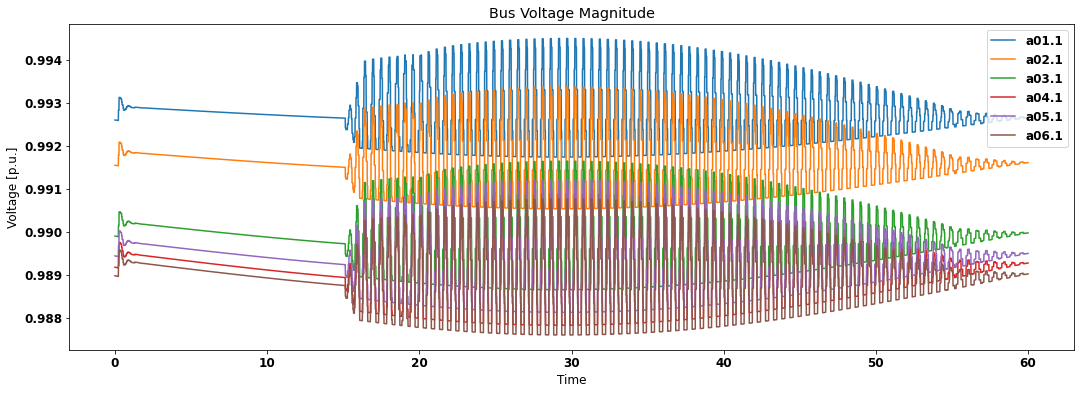

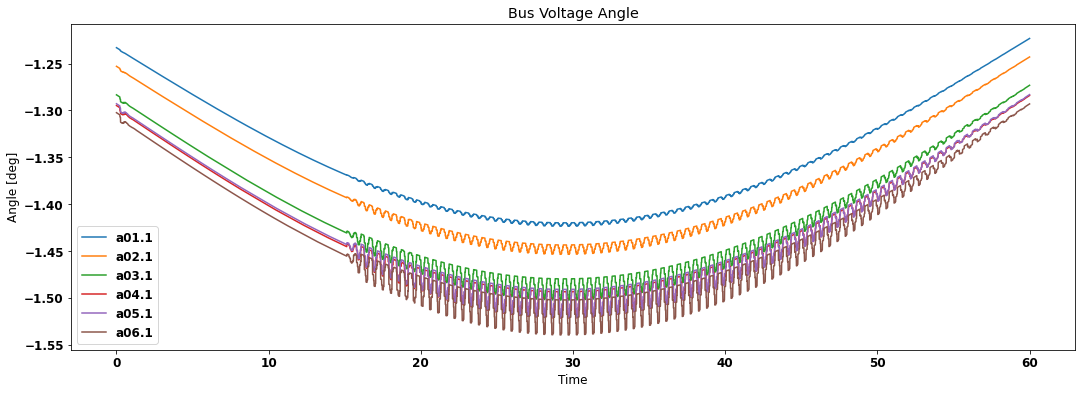

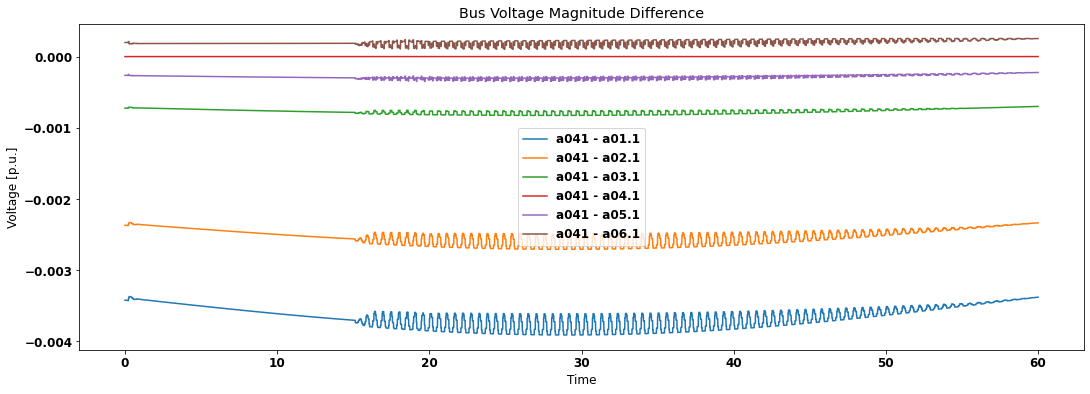

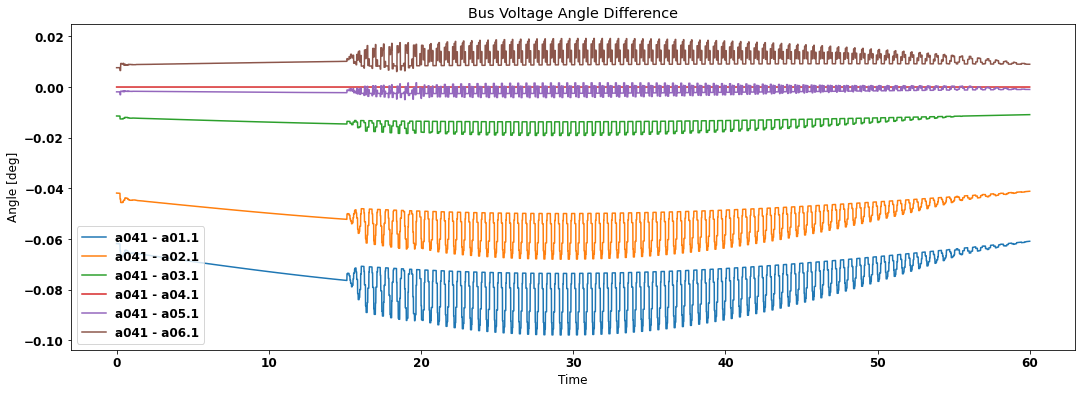

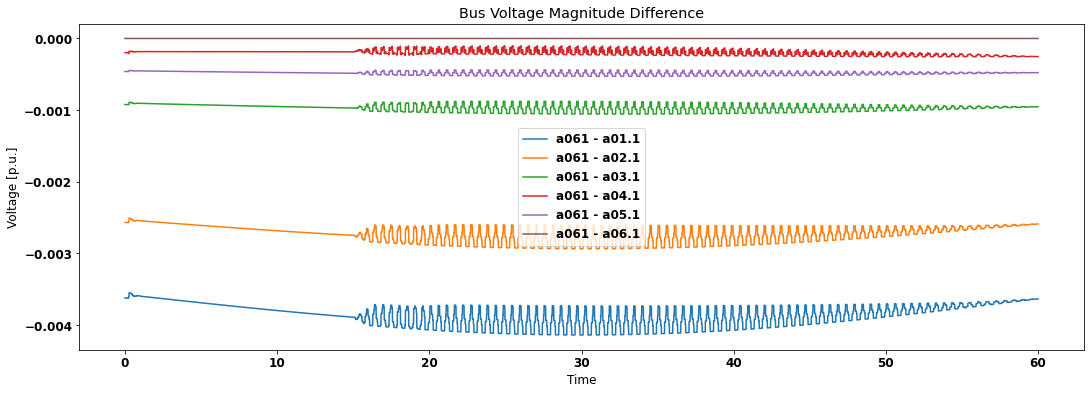

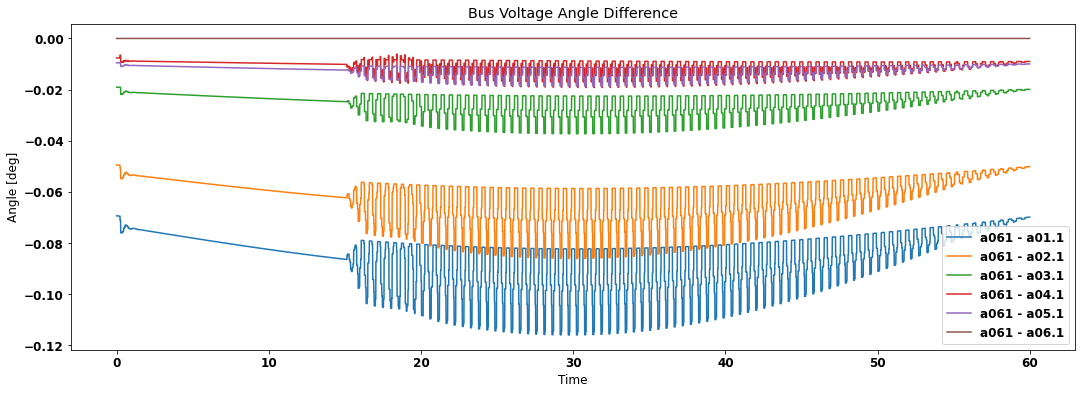

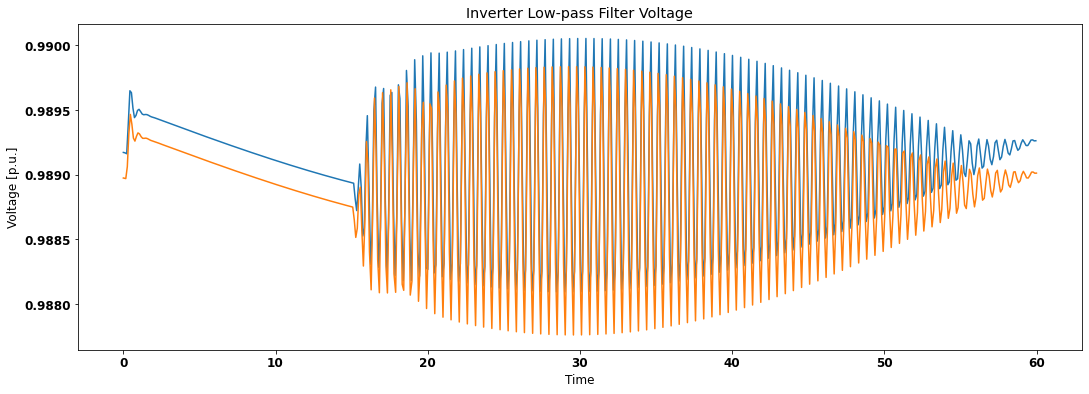

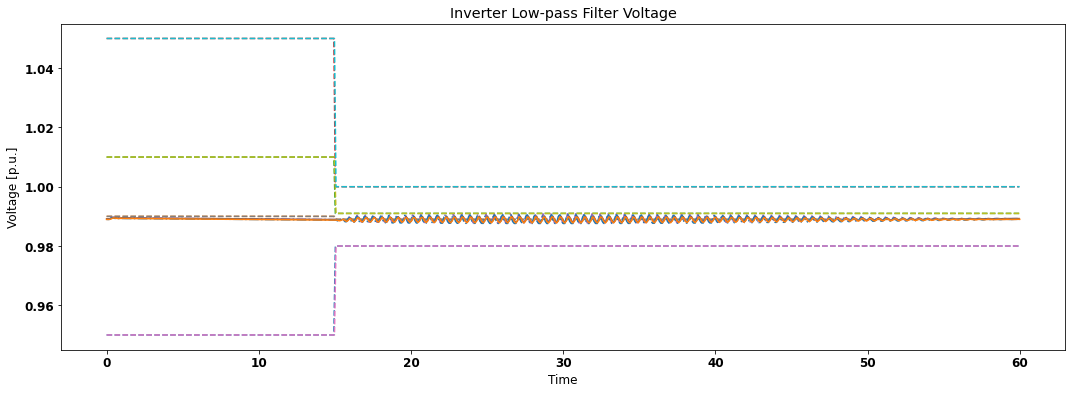

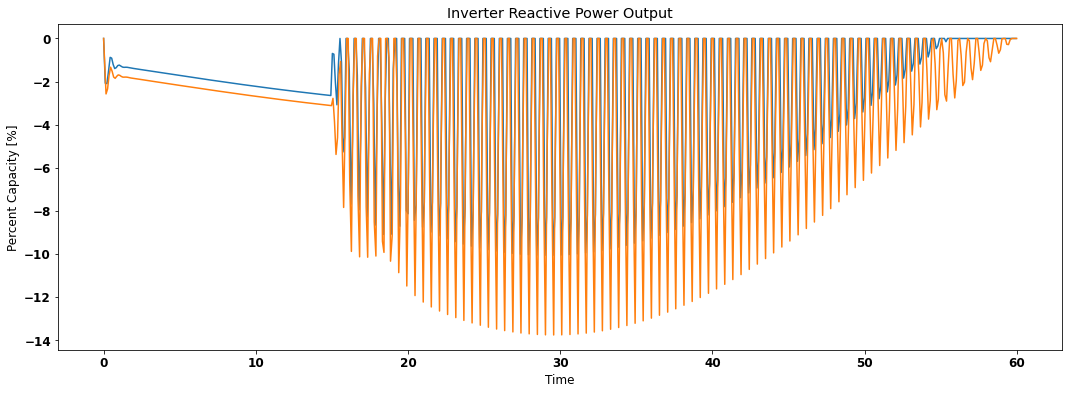

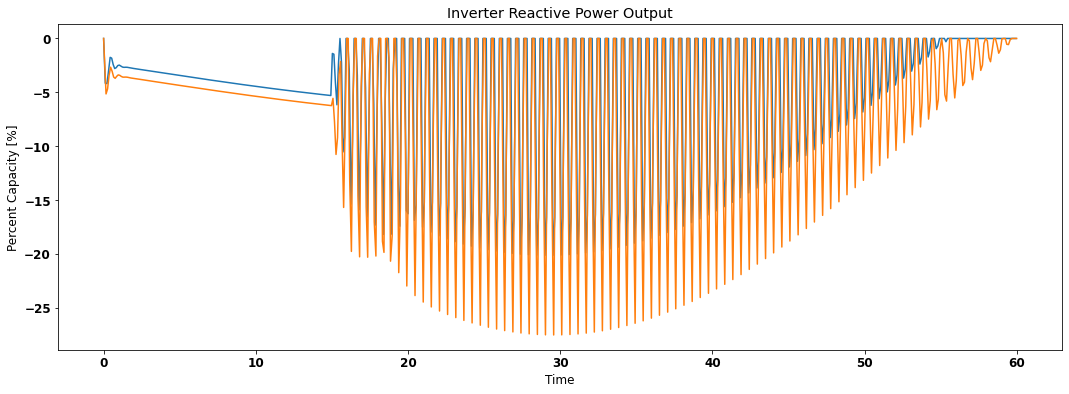

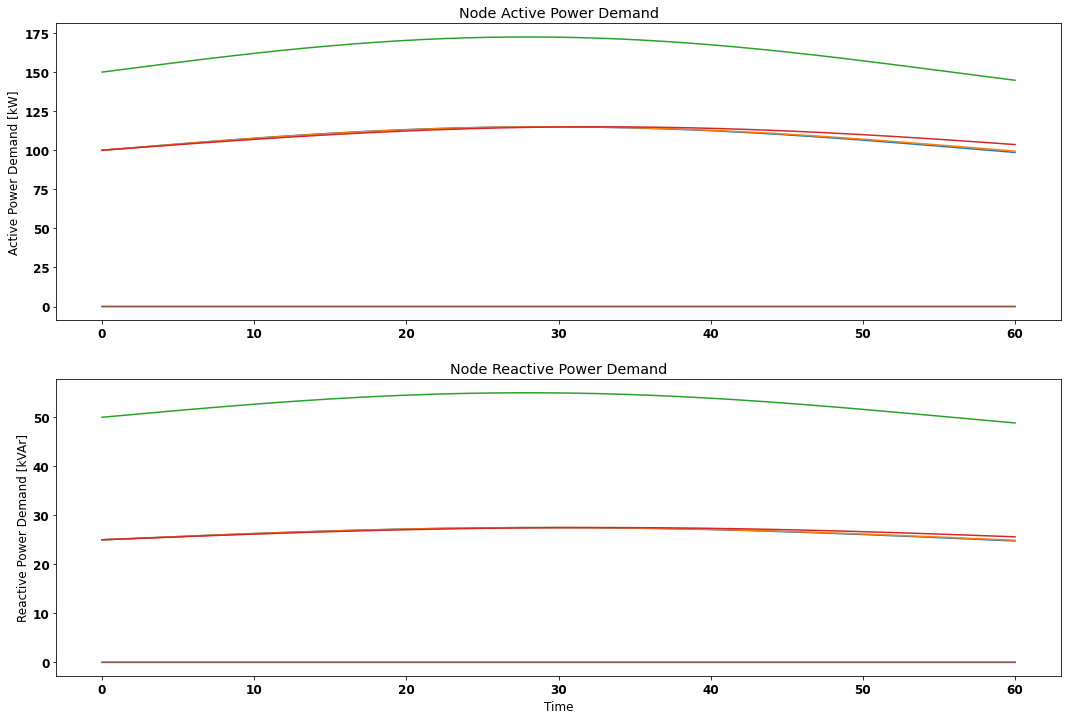

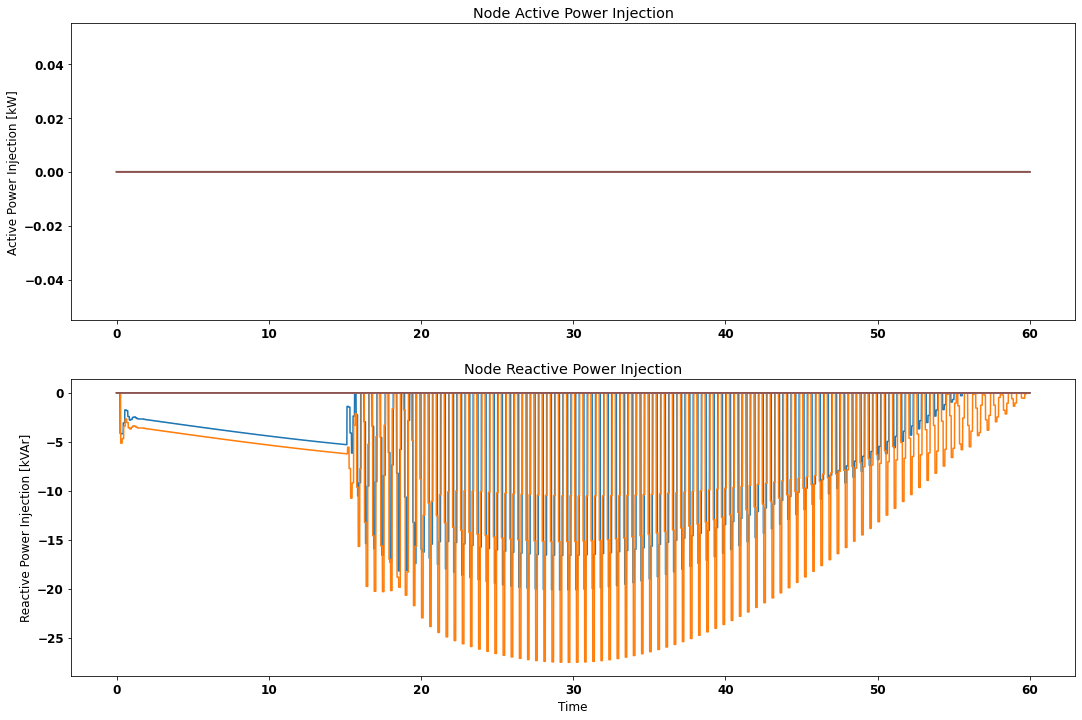

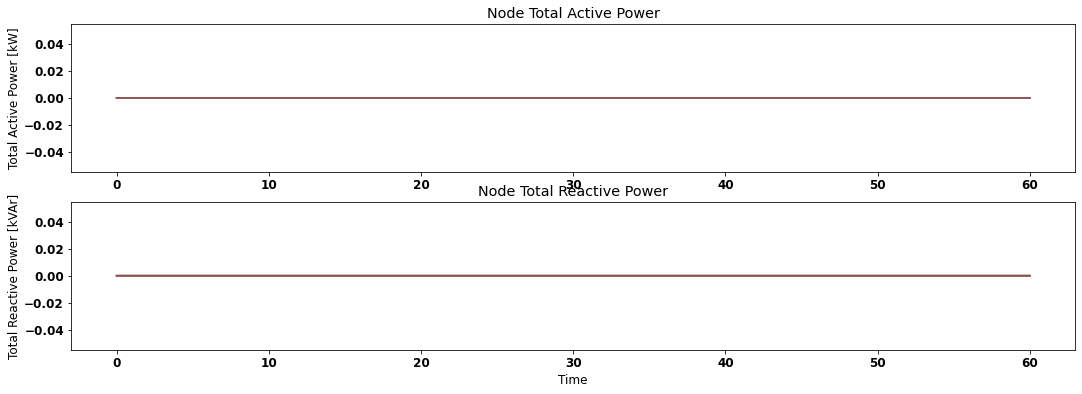

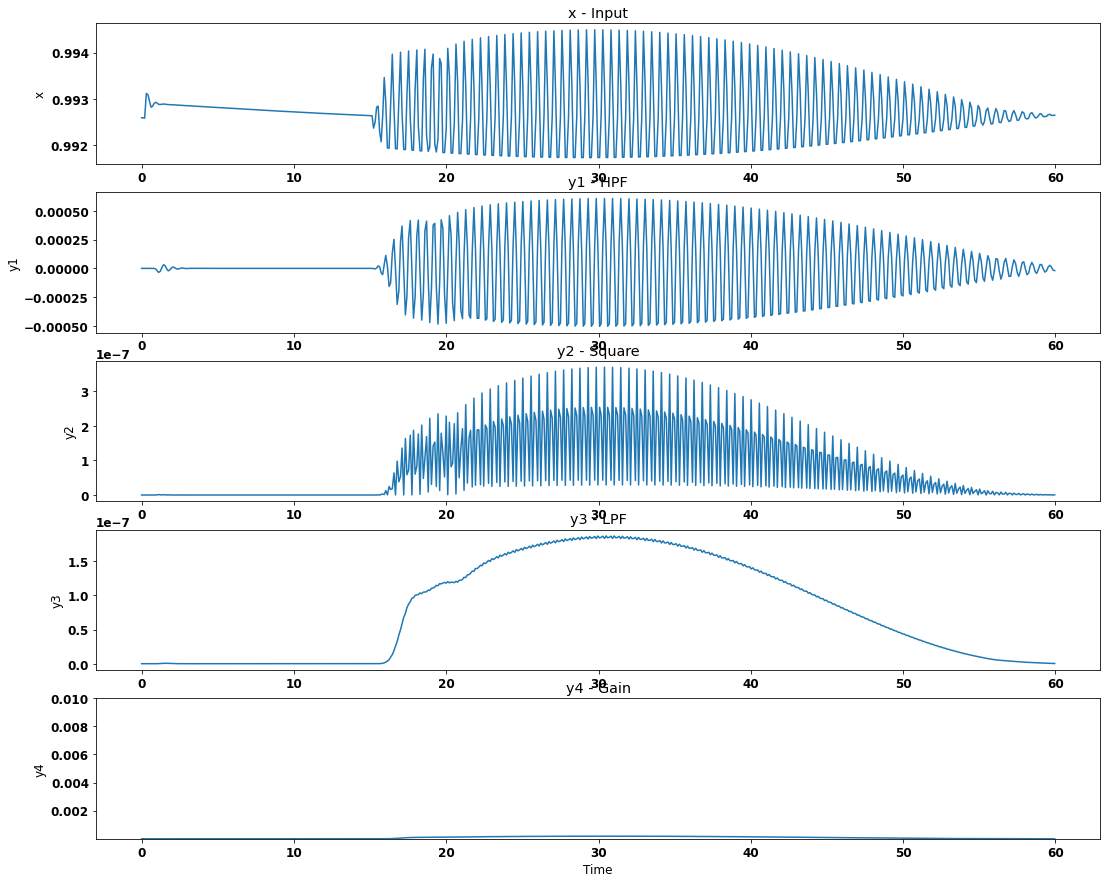

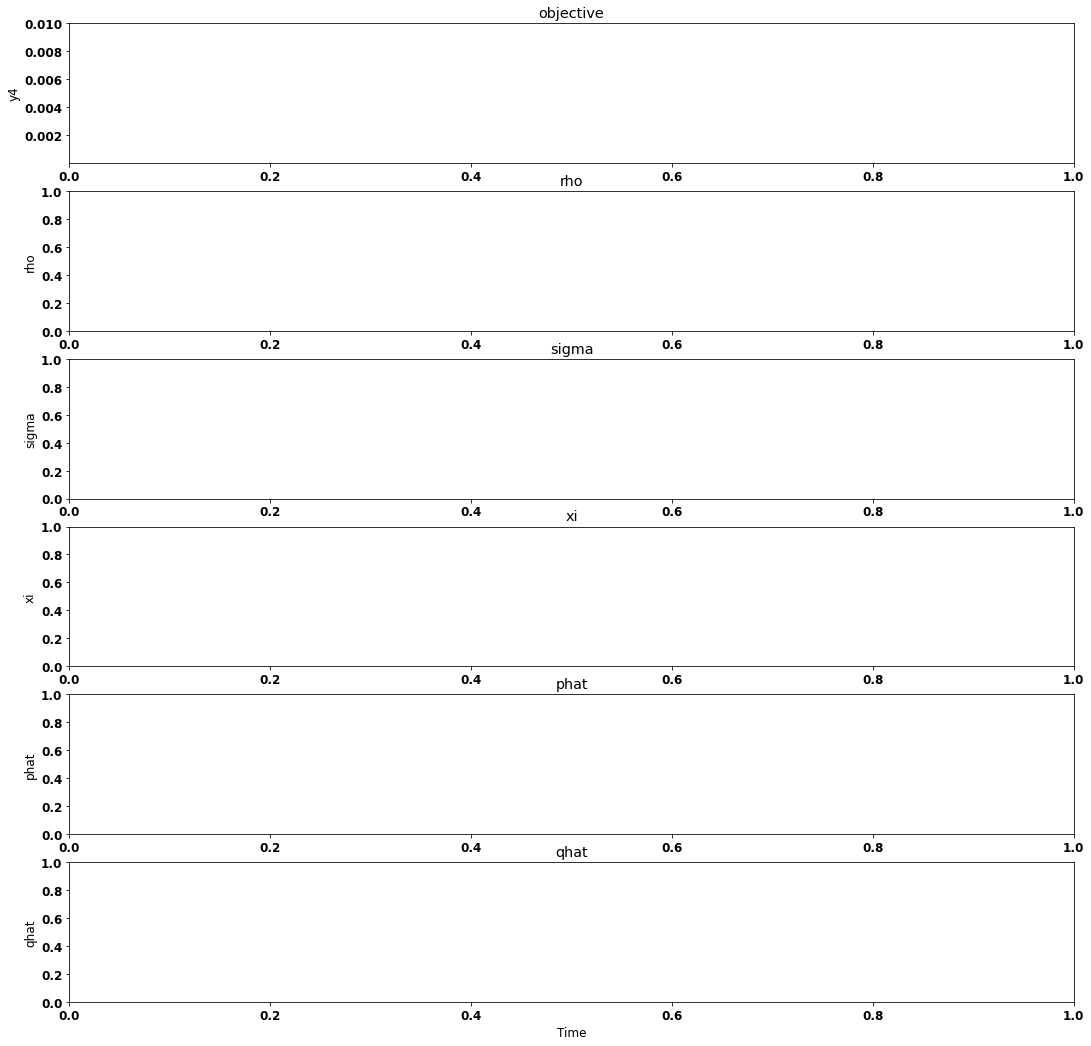

In [6]:
font = {'weight':'bold', 'size':12}

plt.rc('font', **font)

##################################################
# Bus Voltage
##################################################

# Voltage Magnitude
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageMag[:,ph-1,k1],label=AllBuses[k1]+'.'+str(ph))
plt.title('Bus Voltage Magnitude')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

# Voltage Angle
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageAng[:,ph-1,k1],label=AllBuses[k1]+'.'+str(ph))
plt.title('Bus Voltage Angle')
plt.xlabel('Time')
plt.ylabel('Angle [deg]')
plt.legend()
plt.show()

# Voltage Magnitude Difference from A04
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageMag[:,ph-1,AllBuses.index('a04')] - AllBusVoltageMag[:,ph-1,k1],label='a04' + str(ph) + ' - ' + AllBuses[k1] + '.' + str(ph))
plt.title('Bus Voltage Magnitude Difference')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

# Voltage Angle Difference from A04
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageAng[:,ph-1,AllBuses.index('a04')] - AllBusVoltageAng[:,ph-1,k1],label='a04' + str(ph) + ' - ' + AllBuses[k1] + '.' + str(ph))
plt.title('Bus Voltage Angle Difference')
plt.xlabel('Time')
plt.ylabel('Angle [deg]')
plt.legend()
plt.show()

# Voltage Magnitude Difference from A04
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageMag[:,ph-1,AllBuses.index('a06')] - AllBusVoltageMag[:,ph-1,k1],label='a06' + str(ph) + ' - ' + AllBuses[k1] + '.' + str(ph))
plt.title('Bus Voltage Magnitude Difference')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

# Voltage Angle Difference from A04
fig = plt.figure(figsize=[18,6])
for k1 in range(1,len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in range(1,2): # dss.Bus.Nodes():
        plt.plot(time,AllBusVoltageAng[:,ph-1,AllBuses.index('a06')] - AllBusVoltageAng[:,ph-1,k1],label='a06' + str(ph) + ' - ' + AllBuses[k1] + '.' + str(ph))
plt.title('Bus Voltage Angle Difference')
plt.xlabel('Time')
plt.ylabel('Angle [deg]')
plt.legend()
plt.show()

# fig = plt.figure(figsize=[18,6])
# # plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.'+str(1))
# # plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.'+str(2))
# # plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.'+str(3))
# plt.plot(time,AllBusVoltageMag[:,0,AllBuses.index('a01')],label='a01'+'.a')
# # plt.plot(time,AllBusVoltage[:,1,AllBuses.index('a01')],label='632'+'.b')
# # plt.plot(time,AllBusVoltage[:,2,AllBuses.index('a01')],label='632'+'.c')
# plt.title('Bus 632 Voltage Magnitude')
# plt.xlabel('Time')
# plt.ylabel('Voltage [p.u.]')
# plt.legend()
# plt.show()

# # fig.savefig('/home/michael/Desktop/temp/noreg_nocon_632_voltage.png')

# fig = plt.figure(figsize=[18,6])
# plt.plot(time,AllBusVoltageMag[:,0,AllBuses.index('a04')],label='a04'+'.'+str(1))
# # plt.plot(time,AllBusVoltage[:,1,AllBuses.index('a04')],label='a04'+'.'+str(2))
# # plt.plot(time,AllBusVoltage[:,2,AllBuses.index('a04')],label='a04'+'.'+str(3))
# plt.title('Node Voltage')
# plt.xlabel('Time')
# plt.ylabel('Voltage [p.u.]')
# plt.legend()
# plt.show()

##################################################
# Inverters
##################################################

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
#     plt.plot(inverterlist[k1].Vmeas[:])
    # plt.plot(inverterlist[k1].timeop,inverterlist[k1].VBPhist[:],'--')
    # plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vmeas[:],'-.')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vlp[:])
# plt.ylim([0.85, 1.05])
plt.title('Inverter Low-pass Filter Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
#     plt.plot(inverterlist[k1].Vmeas[:])
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].VBPhist[:],'--')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vmeas[:],'-.')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vlp[:])
# plt.ylim([0.85, 1.05])
plt.title('Inverter Low-pass Filter Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].reactive_power)
# plt.ylim([-100, 100])
plt.title('Inverter Reactive Power Output')
plt.xlabel('Time')
plt.ylabel('Percent Capacity [%]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].qin)
# plt.ylim([-100, 100])
plt.title('Inverter Reactive Power Output')
plt.xlabel('Time')
plt.ylabel('Percent Capacity [%]')
plt.show()

##################################################
# Bus Power
##################################################

fig = plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
plt.plot(time,PloadTS[:,:])
plt.title('Node Active Power Demand')
# plt.xlabel('Time')
plt.ylabel('Active Power Demand [kW]')
plt.subplot(2,1,2)
plt.plot(time,QloadTS[:,:])
plt.title('Node Reactive Power Demand')
plt.xlabel('Time')
plt.ylabel('Reactive Power Demand [kVAr]')
plt.show()

fig = plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
plt.plot(time,PinvTS[:,:])
plt.title('Node Active Power Injection')
# plt.xlabel('Time')
plt.ylabel('Active Power Injection [kW]')
plt.subplot(2,1,2)
plt.plot(time,QinvTS[:,:])
plt.title('Node Reactive Power Injection')
plt.xlabel('Time')
plt.ylabel('Reactive Power Injection [kVAr]')
plt.show()

fig = plt.figure(figsize=[18,6])
plt.subplot(2,1,1)
plt.plot(time,PtotalTS[:,:])
plt.title('Node Total Active Power')
# plt.xlabel('Time')
plt.ylabel('Total Active Power [kW]')
plt.subplot(2,1,2)
plt.plot(time,QtotalTS[:,:])
plt.title('Node Total Reactive Power')
plt.xlabel('Time')
plt.ylabel('Total Reactive Power [kVAr]')
plt.show()

##################################################
# Voltage oscillation observer
##################################################

fig = plt.figure(figsize=[18,15])
plt.subplot(5,1,1)
for voo in voolist:
    plt.plot(voo.timeop,voo.x)
plt.title('x - Input')
# plt.xlabel('Time')
plt.ylabel('x')
plt.subplot(5,1,2)
for voo in voolist:
    plt.plot(voo.timeop,voo.y1)
plt.title('y1 - HPF')
# plt.xlabel('Time')
plt.ylabel('y1')
plt.subplot(5,1,3)
for voo in voolist:
    plt.plot(voo.timeop,voo.y2)
plt.title('y2 - Square')
plt.ylabel('y2')
plt.subplot(5,1,4)
for voo in voolist:
    plt.plot(voo.timeop,voo.y3)
plt.title('y3 - LPF')
plt.ylabel('y3')
plt.subplot(5,1,5)
for voo in voolist:
    plt.plot(voo.timeop,voo.y4)
plt.title('y4 - Gain')
plt.xlabel('Time')
plt.ylabel('y4')
plt.ylim([1e-12, 1e-2])
plt.show()

fig = plt.figure(figsize=[18,18])
plt.subplot(6,1,1)
for k1 in range(len(esclist)):
    plt.semilogy(esclist[k1].timeop,esclist[k1].psi)
plt.title('objective')
plt.ylabel('y4')
plt.ylim([1e-10, 1e-2])
plt.subplot(6,1,2)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].rhop)
    plt.plot(esclist[k1].timeop,esclist[k1].rhoq)
plt.title('rho')
plt.ylabel('rho')
plt.subplot(6,1,3)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].sigmap)
    plt.plot(esclist[k1].timeop,esclist[k1].sigmaq)
plt.title('sigma')
plt.ylabel('sigma')
plt.subplot(6,1,4)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].xip)
    plt.plot(esclist[k1].timeop,esclist[k1].xiq)
plt.title('xi')
plt.ylabel('xi')
plt.subplot(6,1,5)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].phat)
    plt.plot(esclist[k1].timeop,esclist[k1].p)
plt.title('phat')
plt.ylabel('phat')
plt.subplot(6,1,6)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].qhat)
    # plt.plot(esclist[k1].timeop,esclist[k1].q)
plt.title('qhat')
plt.xlabel('Time')
plt.ylabel('qhat')
plt.show()


In [7]:
# from scipy import signal
# import matplotlib.pyplot as plt

# fs = 100
# N = len(time)

# fig = plt.figure(figsize=[18,6])
# for k1 in range(AllBusVoltage.shape[1]):
#     x = AllBusVoltage[:,k1]
#     f, Pxx_den = signal.periodogram(x, fs)
#     plt.semilogy(f, Pxx_den)
#     plt.xlim([0, 3])
#     plt.ylim([1e-10, 1e-2])
#     plt.xlabel('frequency [Hz]')
#     plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [8]:
inverter_params = pd.read_csv('inverter_params.csv',header=0,index_col=0)

inverter_params['Toff'] = 1/100*np.floor(10*np.random.rand(inverter_params.shape[0]))

inverter_params['Toff'].loc[2]

0.04

In [9]:
for k1 in range(len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    print(dss.Bus.Name())
    print(dss.Bus.Nodes())
    print(dss.Bus.kVBase())
    print(dss.Bus.puVmagAngle()[::2])
    print('')

sourcebus
[1, 2, 3]
132.79056191361394
[0.9999964400464004, 0.9999996616299229, 1.0000002984095169]

a01
[1]
2.7712812921102037
[0.9926501460902517]

a02
[1]
2.7712812921102037
[0.9916058034166811]

a03
[1]
2.7712812921102037
[0.989970767938586]

a04
[1]
2.7712812921102037
[0.9892705164175852]

a05
[1]
2.7712812921102037
[0.9894940249542925]

a06
[1]
2.7712812921102037
[0.9890172908704777]



In [10]:
for k1 in range(len(dss.Loads.AllNames())):
    dss.Loads.Name(dss.Loads.AllNames()[k1])
    dss.CktElement.AllPropertyNames()
    print(dss.Loads.Name())
    print(dss.Loads.IsDelta())
    print(dss.CktElement.BusNames()[0].split('.',1))
    print(dss.Loads.IsDelta())
    print(dss.CktElement.NodeOrder())    
    print(dss.Loads.kV())
    print(dss.Loads.kVABase())
    print(dss.Loads.kW())
    print(dss.Loads.kvar()) 
    print(dss.CktElement.Powers())
    print('')

load_a02_a
False
['a02', '1']
False
[1, 0]
2.77128
101.65278089427062
98.58997341513309
24.764995569188848
[98.58997388333472, 24.764998569635264, 0.0, 0.0]

load_a03_a
False
['a03', '1']
False
[1, 0]
2.77128
102.51418613369249
99.4424264058592
24.907071067643198
[99.44242708805066, 24.90707421619645, 0.0, 0.0]

load_a04_a
False
['a04', '1']
False
[1, 0]
2.77128
152.7951064185869
144.77919858040258
48.83982190675613
[144.7791993483242, 48.83982675518881, 0.0, 0.0]

load_a06_a
False
['a06', '1']
False
[1, 0]
2.77128
106.74859493606327
103.63217609748499
25.605362682914162
[103.63217694974415, 25.60536603366774, 0.0, 0.0]

inv_a04_1_1
False
['a04', '1']
False
[1, 0]
2.4
0.0
0.0
0.0
[0.0, -0.0, 0.0, 0.0]

inv_a06_1_1
False
['a06', '1']
False
[1, 0]
2.4
0.0
0.0
0.0
[0.0, -0.0, 0.0, 0.0]



In [11]:
print(dss.Circuit.AllBusNames())
AllBusVoltage[0,:,1]

['sourcebus', 'a01', 'a02', 'a03', 'a04', 'a05', 'a06']


NameError: name 'AllBusVoltage' is not defined

In [12]:
kt

6000

In [13]:
# fig = plt.figure(figsize=[18,9])
# plt.subplot(2,1,1)
# plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.a')
# plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.b')
# plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.c')
# plt.title('Bus 632 Voltage Magnitude')

# plt.ylabel('Voltage [p.u.]')
# plt.legend()
# plt.subplot(2,1,2)
# plt.semilogy(voolist[0].timeop,voolist[0].y4,label='VOO a')
# plt.semilogy(voolist[1].timeop,voolist[1].y4,label='VOO b')
# plt.semilogy(voolist[2].timeop,voolist[2].y4,label='VOO c')
# plt.semilogy(voolist[2].timeop,voolist[0].y4+voolist[1].y4+voolist[2].y4,label='Total')
# plt.title('Voltage Oscillations')
# plt.xlabel('Time [sec]')
# plt.ylabel('Voltage Oscillation Energy')
# plt.ylim([1e-6, 1e-2])
# plt.legend()
# # plt.subplot(3,1,2)
# # for k1 in range(len(esclist)):
# #     plt.plot(esclist[k1].timeop,esclist[k1].q)
# # plt.title('q')
# # plt.xlabel('Time')
# # plt.ylabel('q')

# plt.show()

# fig.savefig('/home/michael/Desktop/temp/reg_nocon_632_01.png')

In [14]:
fig = plt.figure(figsize=[18,12])
plt.subplot(4,1,1)
plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.a')
plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.b')
plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.c')
plt.title('Bus 632 Voltage Magnitude')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.subplot(4,1,2)
plt.semilogy(time,1e-4*np.ones(len(time)),'k--',label='Threshold')
plt.semilogy(voolist[0].timeop,voolist[0].y4,label='VOO 632 a')
plt.semilogy(voolist[1].timeop,voolist[1].y4,label='VOO 632 b')
plt.semilogy(voolist[2].timeop,voolist[2].y4,label='VOO 632 c')
plt.semilogy(voolist[2].timeop,voolist[0].y4+voolist[1].y4+voolist[2].y4,label='Total')
plt.title('Voltage Oscillations')
# plt.xlabel('Time [sec]')
plt.ylabel('Voltage Oscillation Energy')
plt.ylim([1e-6, 1e-2])
plt.legend()
plt.subplot(4,1,3)
plt.plot(esclist[0].timeop,esclist[0].p,label='ESC 671 a')
plt.plot(esclist[1].timeop,esclist[1].p,label='ESC 671 b')
plt.plot(esclist[2].timeop,esclist[2].p,label='ESC 671 c')
plt.title('ESC Active Power')
plt.ylabel('Active Power [kW]')
plt.legend()
plt.subplot(4,1,4)
plt.plot(esclist[0].timeop,esclist[0].q,label='ESC 671 a')
plt.plot(esclist[1].timeop,esclist[1].q,label='ESC 671 b')
plt.plot(esclist[2].timeop,esclist[2].q,label='ESC 671 c')
plt.title('ESC Reactive Power')
plt.xlabel('Time [s]')
plt.ylabel('Reactive Power [kVAr]')
plt.legend()

plt.show()

# fig.savefig('/home/michael/Desktop/temp/reg_con_632_02.png')

ValueError: '632' is not in list